In [2]:
#Import packages before start
import pandas as pd
import numpy as np
import seaborn as sns

#Dataset location and data selection
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])


**Descriptive Analysis**

First we perform a descriptive analysis on the given dataset, we store the data and add back the header onto a data frame. 

*italicized text*

In [3]:
boston = pd.DataFrame(data)
boston

#Define header Name - colhead
colhead=["CRIM","ZN","INDUS","CHAS","NOX",
       "RM","AGE","DIS","RAD","TAX","PTRATIO",
       "B","LSTAT","MEDV"]

#Set Header equal colhead
#  CRIM     per capita crime rate by town
#   ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#   INDUS    proportion of non-retail business acres per town
#   CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#   NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's
boston.columns = colhead

#Validate
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


There is 506 observations in total with 14 variables (13 predictors and 1 dependent variable). By using  the describe function we can have some ideas regards on those varibalie in term of range, mean, min, max and standard deviation. As the measurements of the variable are very difference, we will apply scaling on the data to ignore bias.

In [4]:
#Dataset Prelimit check
#506 rows and 14 columns
boston.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

In [5]:
# check the data range since the measurement are difference in all columns
# we will apply scale later on
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We use heatmap to visual any missing values in column level, and the finding is no data missing in any columns.

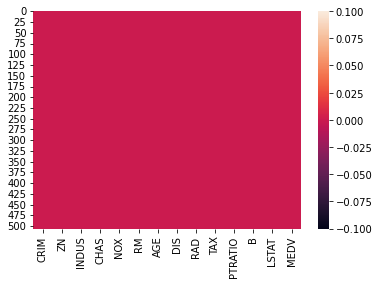

In [6]:
sns.heatmap(boston.isnull())

Pair port give some ideas on the relationship between predictors and MEDV variaable.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


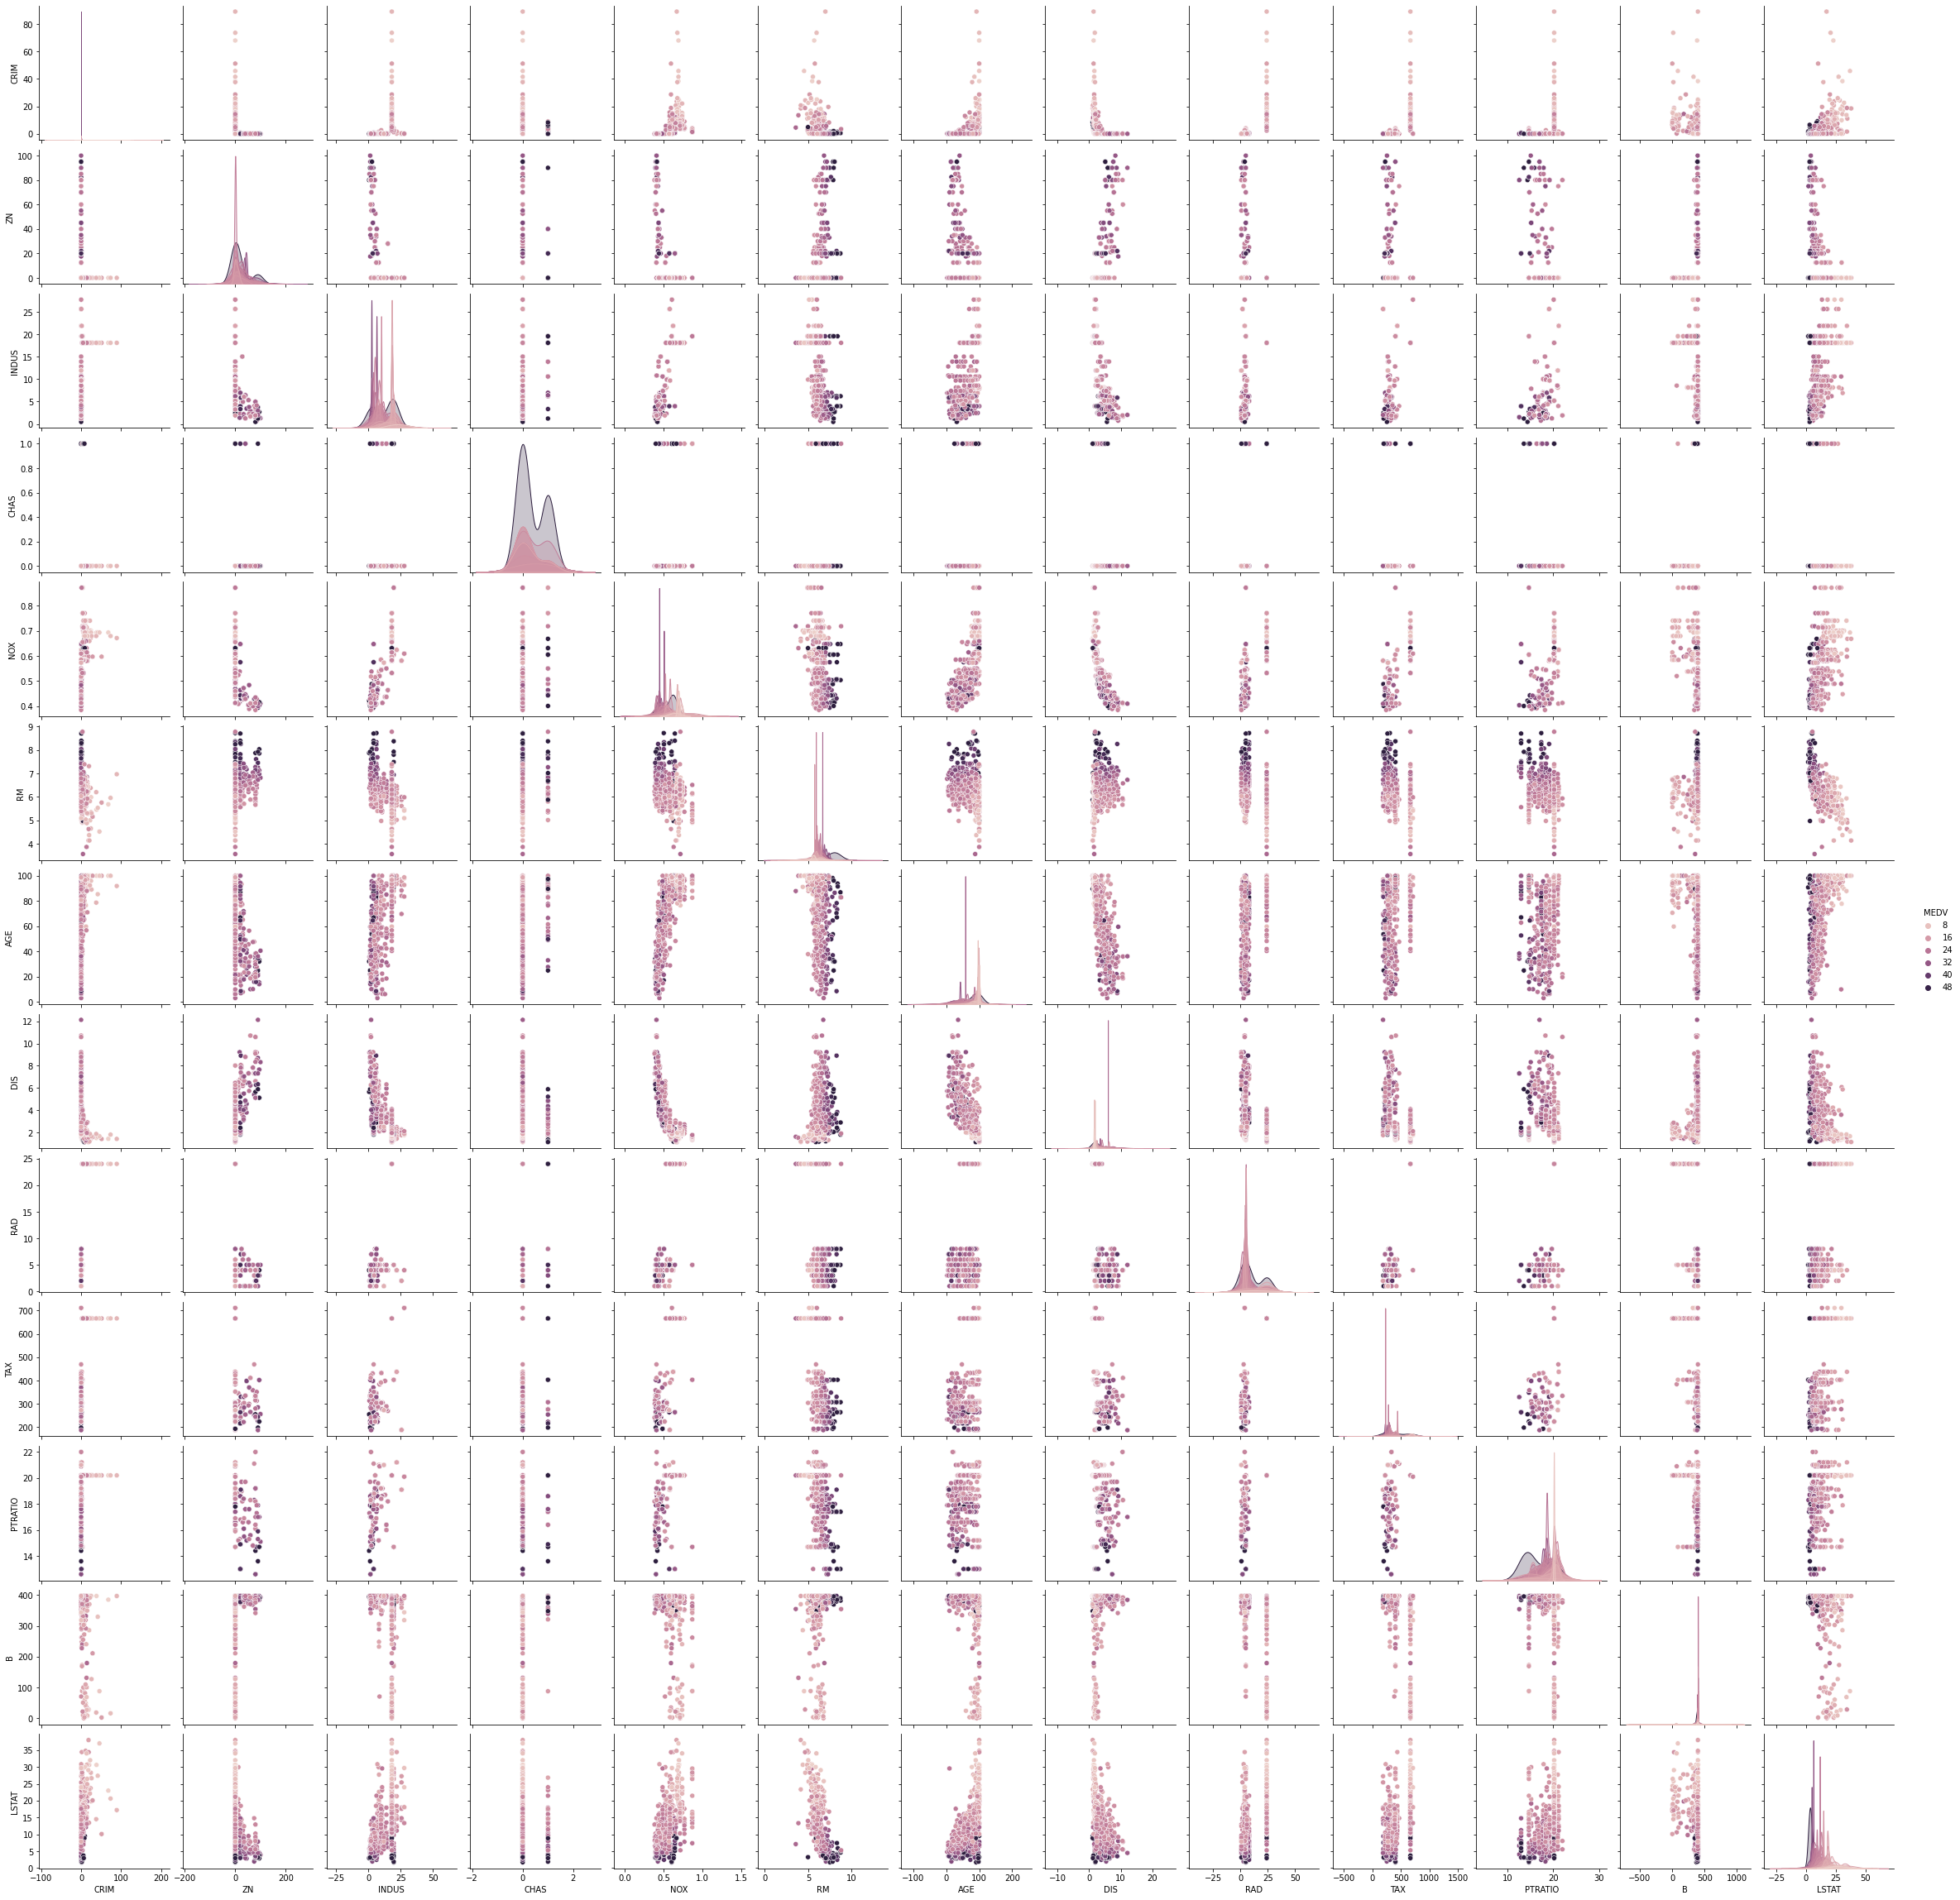

In [7]:
# check the relationship pairs of the dataset
sns.pairplot(boston, hue='MEDV', size=2.5)

We also like to examine the correlation of the Boston.

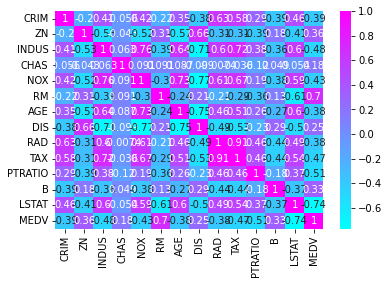

In [8]:
sns.heatmap(boston.corr(),cmap='cool',annot=True)

**Linear Regression Model on Boston Housing**

First, we seperate the dataset into the two. Dataset X with all predictors and Array Y only with the response variable. Then we split the data into train and test datasets, we use the train data for model training and use the test data on model evaluation.

In [9]:
# Split predictors and dependent variables into X and Y
# double brakets as Panda Dataframe
# Single brakes as Panda Series

X = boston[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
Y = boston['MEDV']

# Applied Scaling
from sklearn.preprocessing import scale
X = scale(X)
Y = scale(Y)

#Import train_test_split function from sklearn package
from sklearn.model_selection import train_test_split

# Using the train_test_split function to split data with 0.75:0.25 and set seed at 527
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=527)

In [10]:
#Check the shape of 4 dataset after splite
print('size of X_train', X_train.shape)
print('size of Y_train', Y_train.shape)
print('size of X_test', X_test.shape)
print('size of Y_test', Y_test.shape)

size of X_train (379, 13)
size of Y_train (379,)
size of X_test (127, 13)
size of Y_test (127,)


**Stochastic Gradient Descent (SGD) - Elastic Net Penalty**

Stochastic Gradient Descent (SGD) is a simple and very efficient approach to fitting linear classifiers and regressors. The weakness of this method is very sensitive on scaling.

GirdSearch function applied to find the best tolerance value to be applied into the SGD Regressor and 
The following code runs for maximum 800 epoch or until the loss drop by less than  during one epoch with elastic net penaltiy.

In [18]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

# Running the SGD Regression with elasticnet penalty
sgd_en=SGDRegressor(n_iter_no_change = 800, penalty = 'elasticnet',  random_state = 27)

# set up a range of alpha for testing to determine with alpha is the best fit
para ={ 'alpha' : [1.e-3, 1.e-4, 1.e-5, 1.e-6, 1.e-7, 
                   1.e-8, 1.e-9, 1.e-10, 1.e-11, 1.e-12]}

# Use Grid Search - use to determine the best score of the parameter used for modelling
# cvint, cross-validation generator or an iterable, default=None
model_elaNet = GridSearchCV(sgd_en, para, scoring='neg_root_mean_squared_error', cv=7) 
model_elaNet.fit(X_train,Y_train) 

#Train model with train set
print(f"Best Score: {round(model_elaNet.best_score_, 2)}")
print(f"Best Equation: {model_elaNet.best_estimator_}")

Best Score: -0.55
Best Equation: SGDRegressor(alpha=0.001, n_iter_no_change=800, penalty='elasticnet',
             random_state=27)


**Prediction**

Use the SDGRegressor with best equation, then use fit to train model.

In [12]:
model_1 = SGDRegressor(tol=1.e-3, n_iter_no_change=800, penalty='elasticnet', random_state=27)
model_1.fit(X_train,Y_train) 

model_1.intercept_, model_1.coef_

(array([0.00966943]),
 array([-0.09387446,  0.14197634,  0.06718423,  0.06903762, -0.24762018,
         0.29380631,  0.03129557, -0.33506591,  0.29442492, -0.22676828,
        -0.22966103,  0.1203001 , -0.44963396]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


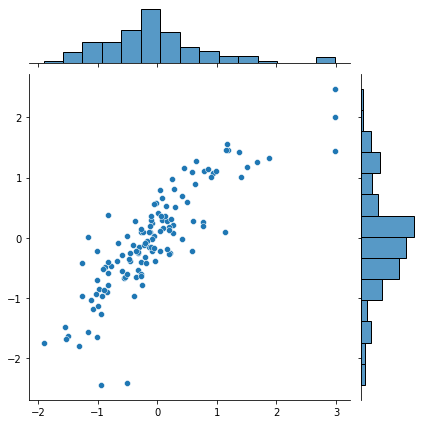

In [13]:
#Model Prediction
prediction_SGD_reg = model_1.predict(X_test)

#prediction from model 
sns.jointplot(Y_test,prediction_SGD_reg,kind='scatter')

**Stochastic Gradient Descent (SGD) - Ridge Regression**

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated.

In [14]:
#Run SGD with Ridge Regression
sgd_L2 = SGDRegressor(penalty="l2", random_state = 120)
sgd_L2.fit(X_train,Y_train)  
sgd_L2.intercept_, sgd_L2.coef_

(array([0.00812878]),
 array([-0.08330058,  0.09081063, -0.01138038,  0.07406202, -0.16498134,
         0.33112164,  0.0062055 , -0.24990017,  0.12445684, -0.04047992,
        -0.2231697 ,  0.12681428, -0.43251898]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


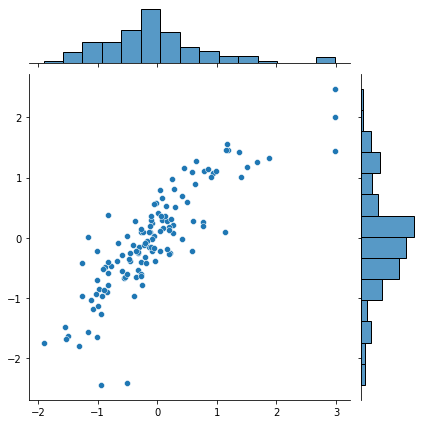

In [15]:
#prediction
prediction_SGD_L2=sgd_L2.predict(X_test)

#prediction from model 
sns.jointplot(Y_test,prediction_SGD_reg,kind='scatter')

**KFold and Cross Validation Scores**

The figure cannot tell which model is better as the value are closed to each others.

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

KF = KFold(n_splits = 5, random_state=72, shuffle=True)

print('SGD Model with Elastic Net:')
sgn_EN_MAE_EN=cross_val_score(model_1, X_train, Y_train, scoring='neg_median_absolute_error', cv=KF)
print('Median Absolute Error (MAE) =',sgn_EN_MAE_EN)
sgn_EN_VAR=cross_val_score(model_1, X_train, Y_train, scoring='explained_variance', cv=KF)
print('Explained Variance =',sgn_EN_VAR)
sgn_EN_negMse = cross_val_score(model_1, X_train, Y_train, scoring = 'neg_root_mean_squared_error', cv = KF)
print('Negative Root Mean Square Error:', sgn_EN_negMse)
sgn_EN_rSquare = cross_val_score(model_1, X_train, Y_train, scoring = 'r2', cv = KF)
print('R Square:', sgn_EN_rSquare)

print('--------------------------------------------------------------------------')

print('SGD Model with Ridge:')
sgn_l2_MAE_EN=cross_val_score(sgd_L2, X_train, Y_train, scoring='neg_median_absolute_error', cv=KF)
print('Median Absolute Error (MAE) =',sgn_l2_MAE_EN)
sgn_l2_VAR=cross_val_score(sgd_L2, X_train, Y_train, scoring='explained_variance', cv=KF)
print('Explained Variance =',sgn_l2_VAR)
sgn_l2_negMse = cross_val_score(sgd_L2, X_train, Y_train, scoring = 'neg_root_mean_squared_error', cv = KF)
print('Negative Root Mean Square Error:', sgn_l2_negMse)
sgn_l2_rSquare = cross_val_score(sgd_L2, X_train, Y_train, scoring = 'r2', cv = KF)
print('R Square:', sgn_l2_rSquare) 

SGD Model with Elastic Net:
Median Absolute Error (MAE) = [-0.20261513 -0.29879326 -0.27738221 -0.32290293 -0.28173066]
Explained Variance = [0.74754587 0.76180935 0.70154738 0.76027958 0.69162053]
Negative Root Mean Square Error: [-0.50412236 -0.57377072 -0.58049042 -0.49494925 -0.57856401]
R Square: [0.74752093 0.75161888 0.6995604  0.70666769 0.69008145]
--------------------------------------------------------------------------
SGD Model with Ridge:
Median Absolute Error (MAE) = [-0.20270997 -0.35706718 -0.2443474  -0.29133284 -0.2491531 ]
Explained Variance = [0.74437369 0.75897325 0.69918215 0.75583535 0.68670595]
Negative Root Mean Square Error: [-0.50725776 -0.58043334 -0.58230809 -0.50248971 -0.58406713]
R Square: [0.74437057 0.74581699 0.69767594 0.69766188 0.68415771]
